# Ejercicio 1#

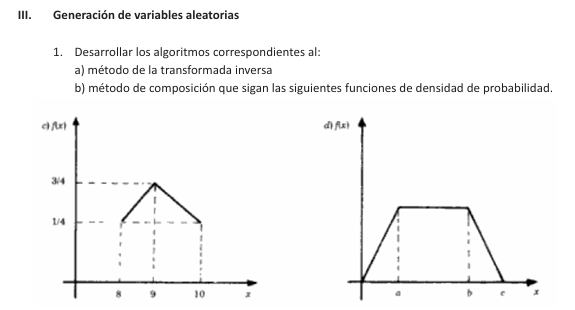

## Importacion de librerias

In [ ]:
import random,math,numpy as np,matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

##a. metodo de la transformada inversa para las siguientes distribuciones

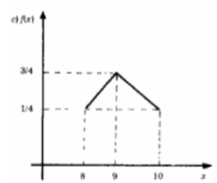

[9.49042306 8.47703682 8.9570012  ... 8.8756649  8.27962333 8.44039329]


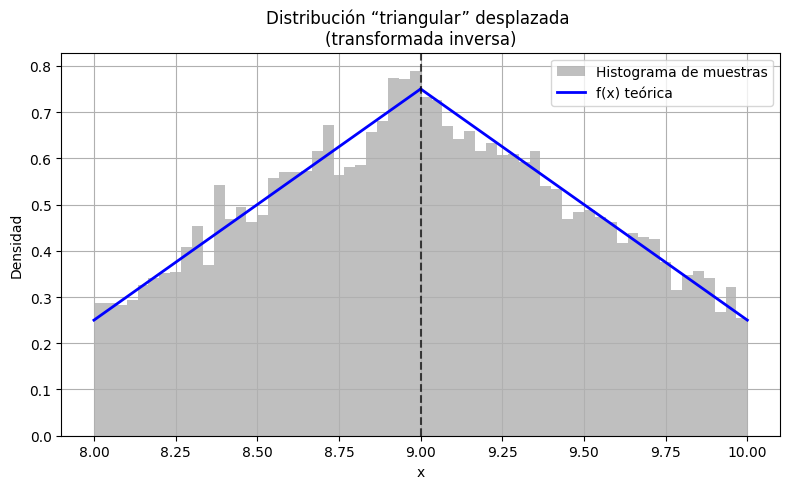

In [ ]:
def sample_triangular(n=10000):

    u = np.random.rand(n)
    x = np.empty(n)

    mask1 = u < 0.5
    u1 = u[mask1]
    y1 = (-1 + np.sqrt(1 + 16*u1)) / 2
    x[mask1] = 8 + y1

    mask2 = ~mask1
    u2 = u[mask2] - 0.5
    z2 = (3 - np.sqrt(9 - 16*u2)) / 2
    x[mask2] = 9 + z2

    return x

def inverse_triangular(n_samples=10000):
    a, m, b = 8, 9, 10

    samples = sample_triangular(n_samples)
    print(samples)

    x1 = np.linspace(a, m, 200)
    f1 = 1/4 + 1/2*(x1 - a)
    x2 = np.linspace(m, b, 200)
    f2 = 3/4 - 1/2*(x2 - m)

    plt.figure(figsize=(8,5))

    plt.hist(samples, bins=60, density=True, alpha=0.5, color='gray',
             label='Histograma de muestras')

    plt.plot(x1, f1, 'b-', lw=2, label='f(x) teórica')
    plt.plot(x2, f2, 'b-', lw=2)

    plt.axvline(m, color='k', linestyle='--', alpha=0.7)
    plt.title('Distribución “triangular” desplazada \n(transformada inversa)')
    plt.xlabel('x')
    plt.ylabel('Densidad')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Ejecuta la gráfica
inverse_triangular()


##- Ahora con el trapezoide

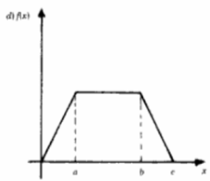

[2.44758446 3.45036102 2.75100474 ... 2.03626779 1.79685866 2.56330638]


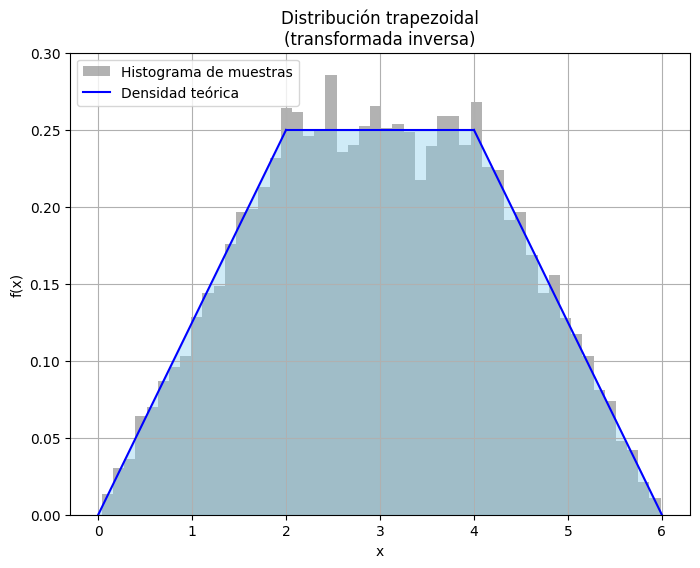

In [ ]:
def trapezoidal_samples(n=1000, a=2, b=4, c=6):
    samples = []
    while len(samples) < n:
        u = np.random.uniform(0, 1)
        h = 2 / (c + b - a)

        Fa = (a * h) / 2
        Fb = Fa + (b - a) * h

        if u < Fa:
            x = np.sqrt(u * 2 * a / h)
        elif u < Fb:
            x = a + (u - Fa) / h
        else:
            x = c - np.sqrt((1 - u) * 2 * (c - b) / h)
        samples.append(x)
    return np.array(samples)

def inverse_trapezoidal(a=2, b=4, c=6, n_samples=10000):
    h = 2 / (c + b - a)

    # Tramos de la función de densidad
    x1 = np.linspace(0, a, 100)
    f1 = (2 * x1) / (a * (c + b - a))

    x2 = np.linspace(a, b, 100)
    f2 = np.full_like(x2, h)

    x3 = np.linspace(b, c, 100)
    f3 = (2 * (c - x3)) / ((c - b) * (c + b - a))

    # Generar muestras
    samples = trapezoidal_samples(n_samples, a, b, c)
    print(samples)

    # Graficar
    plt.figure(figsize=(8, 6))

    # Histograma de las muestras
    plt.hist(samples, bins=50, density=True, alpha=0.6, color='gray', label='Histograma de muestras')

    # Función de densidad teórica
    plt.plot(x1, f1, color='blue', label='Densidad teórica')
    plt.plot(x2, f2, color='blue')
    plt.plot(x3, f3, color='blue')

    # Área bajo la curva
    plt.fill_between(x1, f1, color='skyblue', alpha=0.4)
    plt.fill_between(x2, f2, color='skyblue', alpha=0.4)
    plt.fill_between(x3, f3, color='skyblue', alpha=0.4)

    plt.title('Distribución trapezoidal\n(transformada inversa)')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejecutar
inverse_trapezoidal()


##b. metodo de composición que siga las siguientes distribuciones:

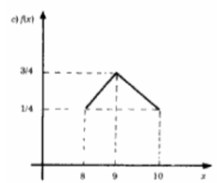

9.80027038169239 8.939542530834938 8.614742646277056 9.564369961633666 8.2367661598962 9.87808859772402 9.578335944579848 9.116031761854874 9.146167953848185 9.685182829020807 8.644272213911975 8.746059802562883 9.313242384839228 8.937628373200418 8.661930394773682 9.948592072546484 8.669132060065424 8.412878626366524 9.414432262133557 8.159880351051104 8.298066628383012 9.253687637293858 9.14478465614625 9.282458533329224 8.540684497664355 8.482186473300878 8.108039494378813 9.310336939036345 9.79170674239066 8.516875143635893 9.423660318499465 9.557313445002126 9.826418628274388 9.54923780512615 9.565886109121568 8.65099665273206 9.346525083048842 9.671969345983245 8.54508786440708 8.266783226909265 9.890671180821501 9.732883198702526 9.243957794985992 9.519663715931804 9.946992373691044 9.105220282734624 8.934692306427971 9.235920104685384 9.748879156610172 9.194277214634807 8.416738562178198 8.358962930412046 9.928336401273635 9.311773025130933 8.827711174914437 9.753795156967897 9

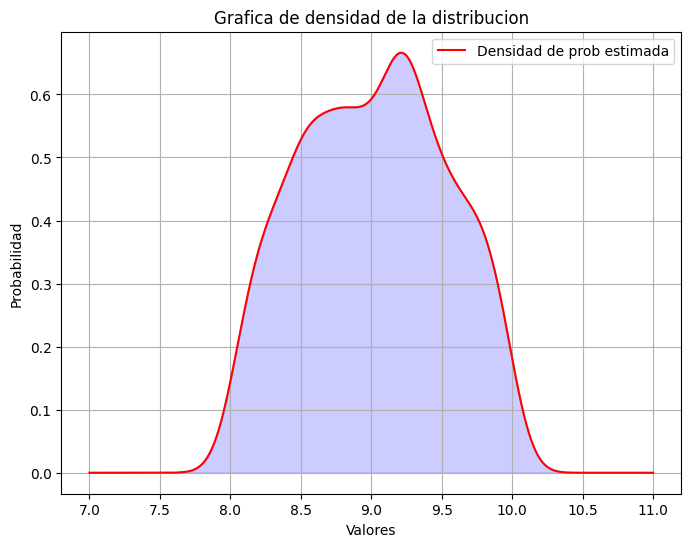

In [ ]:
def random_comp_a(max):
    random_gen = []
    for i in range (max):
        total = 0
        R1 = random.random()
        R2 = random.random()
        if(R1 <= 1/2):
            total = (15/2) + math.sqrt(2*(R2-28) + 225/4)
        else:
            total = (21/2) - math.sqrt(-2*(R2+54) + 441/4)
        random_gen.append(total)
    return random_gen

data = random_comp_a(1000)

for i in range(len(data)):
    print(data[i],end=" ")
kde = gaussian_kde(data)
x_v = np.linspace(7,11,1000)
y_v= kde(x_v)
plt.figure(figsize=(8,6))
plt.plot(x_v,y_v, label='Densidad de prob estimada', color='red')
plt.fill_between(x_v,y_v, color = 'blue', alpha = 0.2)
plt.title("Grafica de densidad de la distribucion")
plt.xlabel("Valores")
plt.ylabel("Probabilidad")
plt.legend()
plt.grid(True)
plt.show()

##- Ahora con el trapezoide

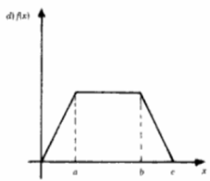

1.0298217015941218 0.7351807481034708 2.9164708108643396 4.1278003529876885 1.0762177318385342 1.2753959930783823 1.589680285272611 1.6250582915884664 2.9464341583769 2.083743567190152 3.0445481560667775 1.462305622597891 1.5469031130961068 2.40083528503333 2.367932972133895 1.2967963150476143 1.5719566121990252 3.0616347474967647 3.5135619577295083 4.451436316788644 2.09816610641382 1.3376628201853706 3.343035222731392 2.940122079863161 1.9302754729996416 3.9502433777800197 2.344600799118876 1.3481464536391958 2.0445192596103077 2.4307521674523254 1.149364519970708 1.5636408483302333 1.9007884901404168 3.093607988635658 1.8531909663932429 3.8799452770801306 3.5981660821796355 1.268274438300078 4.416212205091142 1.4873792495465596 1.9707620478057735 1.0176707043894875 2.4926927262698673 1.880054537576967 1.3154538270046912 1.3719414107949515 2.886981500463362 3.2496809892411225 1.7098166501305425 1.323159102309882 3.6904744407840706 1.7513182955070572 3.5666548489959213 3.0319555286348

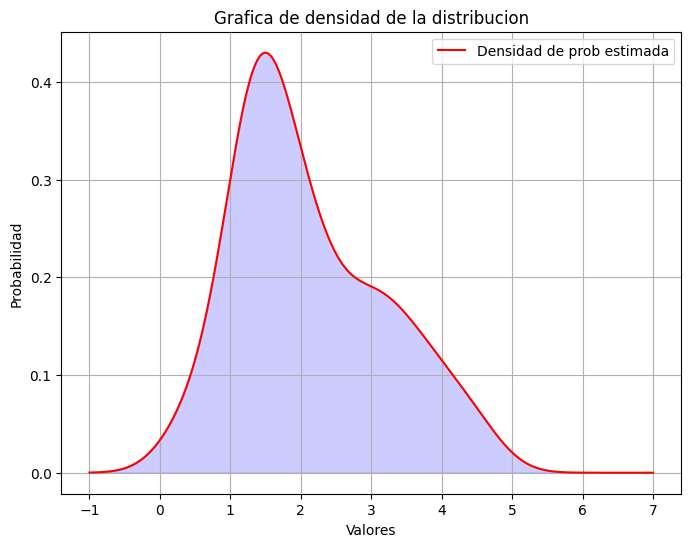

In [ ]:
def random_comp_b(max):
    random_gen = []
    a,b,c = 1,3,5
    k = 2 / (c+b-a)
    for i in range (max):
        total = 0
        R1 = random.random()
        R2 = random.random()
        if(R1 <= (a*k)/2):
            total = a * math.sqrt(2*R2)
        elif R1 < k * (b-a) + (a*k)/2:
            total = (b-a) * R2 + a
        else:
            total = c - math.sqrt((c*c) - 2*b*c+b*b-R2*(c*c)+2*R2*c*b-R2*b*b)
        random_gen.append(total)
    return random_gen

data = random_comp_b(100)

for i in range(len(data)):
    print(data[i],end=" ")
kde = gaussian_kde(data)
x_v = np.linspace(-1,7,1000)
y_v= kde(x_v)
plt.figure(figsize=(8,6))
plt.plot(x_v,y_v, label='Densidad de prob estimada', color='red')
plt.fill_between(x_v,y_v, color = 'blue', alpha = 0.2)
plt.title("Grafica de densidad de la distribucion")
plt.xlabel("Valores")
plt.ylabel("Probabilidad")
plt.legend()
plt.grid(True)
plt.show()

# **Ejercicio 2**




**Descargamos las librerias nescesarias para la simulacion:**

In [ ]:
!pip install numpy matplotlib
!pip install simpy

### **Algoritmo**:

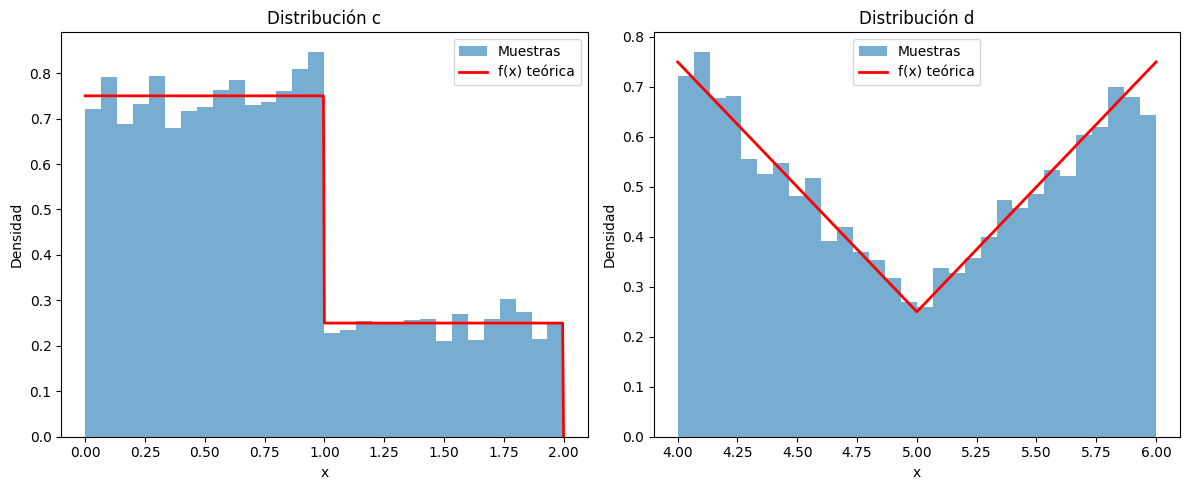

In [ ]:
import simpy
import random
import matplotlib.pyplot as plt

# Definición de las funciones objetivo f(x)
def fx_c(x):
    if 0 <= x < 1:
        return 0.75
    elif 1 <= x < 2:
        return 0.25
    else:
        return 0.0


def fx_d(x):
    if 4 <= x < 5:
        return  (-0.5) * (x) + 2.75
    elif 5 <= x <= 6:
        return (0.5) * (x) - 2.25
    else:
        return 0.0

# Proceso de rechazo general usando SimPy

def rejection_sampling(env, samples, f, a, b, M, name):
    while True:
        x = random.uniform(a, b)        # Candidato X ~ U(a,b)
        u = random.uniform(0, M)        # U ~ U(0,M)
        if u <= f(x):                   # Aceptación si U <= f(x)
            samples.append(x)
        yield env.timeout(1)            # 1 unidad de tiempo entre intentos

# Función principal para correr la simulación

def run_simulation():
    env = simpy.Environment()

    # Configuración para los dos casos (c y d)
    configurations = [
        {"name": "Distribución c", "f": fx_c, "a": 0, "b": 2, "M": 0.75},
        {"name": "Distribución d", "f": fx_d, "a": 4, "b": 6, "M": 0.75},
    ]

    # Almacenar muestras
    all_samples = []
    for config in configurations:
        samples = []
        env.process(rejection_sampling(env, samples,
                                       config["f"],
                                       config["a"],
                                       config["b"],
                                       config["M"],
                                       config["name"]))
        all_samples.append((config["name"], samples, config))

    # Ejecutar simulación (suficientes pasos para generar varias muestras)
    env.run(until=10000)

    # Graficar resultados
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    for i, (name, samples, config) in enumerate(all_samples):
        ax = axes[i]
        ax.hist(samples, bins=30, density=True, alpha=0.6, label="Muestras")
        x_vals = [config['a'] + j*(config['b']-config['a'])/500 for j in range(501)]
        y_vals = [config['f'](x) for x in x_vals]
        ax.plot(x_vals, y_vals, 'r-', lw=2, label='f(x) teórica')
        ax.set_title(name)
        ax.set_xlabel('x')
        ax.set_ylabel('Densidad')
        ax.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    run_simulation()

# Ejercicio 3

Desarrollar un esquema general para generar valores aleatorios para la distribución triangular con pdf:

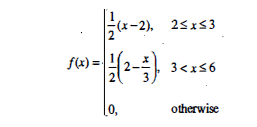

## Desarrollo

Para generar valores aleatorios a partir de esta distribución, utilizaremos el método de la transformada inversa, a partir de los siguientes pasos:

### 1. Encontrar la $F(x)$

$$
F(x) =
\begin{cases}
0, & x < 2 \\
\frac{x^2}{4} - x + 1, & 2 \leq x \leq 3 \\
x - \frac{x^2}{12} - 2, & 3 < x \leq 6 \\
1, & x > 6
\end{cases}
$$


### 2. Invertir (encontrar $F^{-1}(u)$)

Sea $U = F(x)$, donde $U \sim U(0, 1)$. Necesitamos resolver para $x$ en términos de $U$. La función inversa de la función de distribución acumulada es:

$$
F^{-1}(u) =
\begin{cases}
2 + 2\sqrt{u}, & 0 \leq u \leq 1/4 \\
6 - 2\sqrt{3 - 3u}, & 1/4 < u \leq 1
\end{cases}
$$

### 3. Media de la distribución

La media teórica de la distribución continua dada es:

$$\mu = \int_{2}^{3} x \cdot \frac{1}{2}(x-2) dx + \int_{3}^{6} x \cdot \frac{1}{2}(2 - \frac{x}{3}) dx$$

La media de la distribución es entonces:
$$\mu = \frac{2}{3} + 3 = \frac{11}{3} \approx 3.6667$$


### 4. Algoritmo en Python

1.  Crear una lista llamada `valores`.
2.  Para $i$ desde 1 hasta 10:
    
    a. Generar un valor aleatorio $u$ según una distribución uniforme $U(0, 1)$ usando `random.random()`.
    
    b. Si $0 \leq u \leq 0.25$: Calcular $x = 2 + 2\sqrt{u}$.
    
    c. Si $0.25 < u \leq 1$: Calcular $x = 6 - 2\sqrt{3 - 3u}$.
    
    d. Agregar el valor $x$ a `valores`.

3.  Calcular la media muestral de `valores` usando `np.mean(valores)` y comparar con la media teórica $(\frac{11}{3})$.

## Código generación de variable aleatoria

In [ ]:
import numpy as np
import random
import math

def inversa(u):
    if 0 <= u <= 0.25:
        return 2 + 2 * math.sqrt(u)
    elif 0.25 < u <= 1:
        return 6 - 2 * math.sqrt(3 - 3 * u)
    else:
        return None

def uniforme():
    return random.random() # U(0, 1)

# Generar 10 valores aleatorios
random.seed(42)
num_valores = 10
valores = [inversa(uniforme()) for u in range(num_valores)]
media_muestral = np.mean(valores)
media_teorica = 11/3

# Imprimir resultados
print("RESULTADOS VALORES ALEATORIOS PARA DISTRIBUCIÓN TRIANGULAR\n")
print(f"Valores aleatorios generados:\n{valores}")
print(f"\nMedia muestral: {media_muestral:.4f}")
print(f"Media teórica: {media_teorica:.4f}")
print(f"Diferencia: {abs(media_teorica-media_muestral):.4f}")

RESULTADOS VALORES ALEATORIOS PARA DISTRIBUCIÓN TRIANGULAR

Valores aleatorios generados:
[3.9198849987307445, 2.316295780703233, 3.050483399000682, 2.944903673712454, 4.221701535165749, 4.030328415464886, 4.862526840957618, 2.589707834878989, 3.3661932182149816, 2.3452374222941095]

Media muestral: 3.3647
Media teórica: 3.6667
Diferencia: 0.3019


## Código generación de gráficas

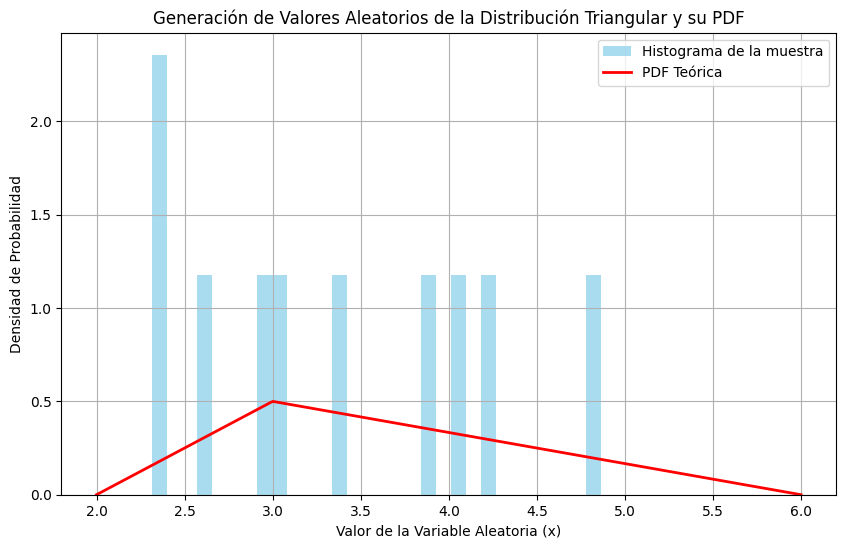

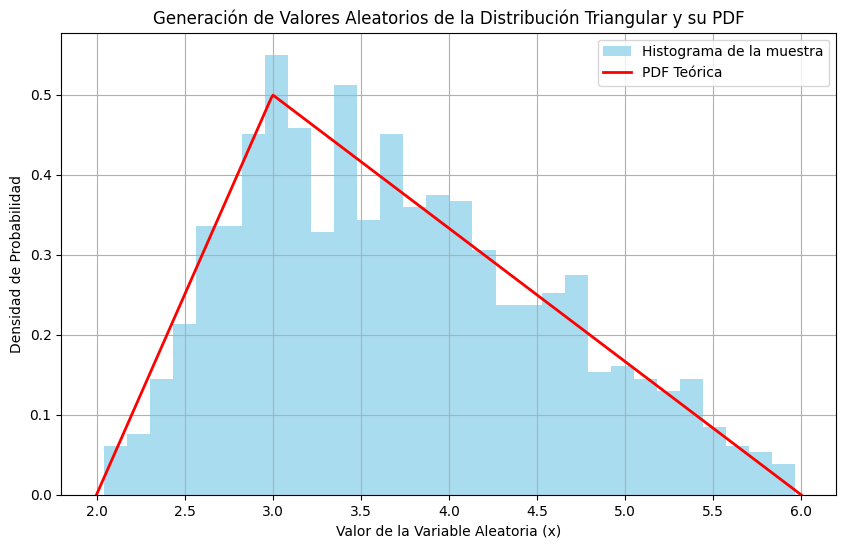

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

def inversa(u):
    if 0 <= u <= 0.25:
        return 2 + 2 * math.sqrt(u)
    elif 0.25 < u <= 1:
        return 6 - 2 * math.sqrt(3 - 3 * u)
    else:
        return None

def uniforme():
    return random.random() # U(0, 1)

def graficar_muestra(num_valores):
    # Generar los valores aleatorios
    valores = [inversa(uniforme()) for i in range(num_valores)]

    # 1. Graficar el Histograma (Estimación de la PDF)
    plt.figure(figsize=(10, 6))
    plt.hist(valores, bins=30, density=True, alpha=0.7, color='skyblue', label='Histograma de la muestra')

    # Graficar la PDF teórica para comparar
    x = np.linspace(2, 6, 400)
    pdf = np.piecewise(x,
                    [((x >= 2) & (x <= 3)), ((x > 3) & (x <= 6))],
                    [lambda x, *args: 0.5 * (x - 2), lambda x, *args: 0.5 * (2 - x / 3)],
                    0)
    plt.plot(x, pdf, 'r-', linewidth=2, label='PDF Teórica')

    plt.title('Generación de Valores Aleatorios de la Distribución Triangular y su PDF')
    plt.xlabel('Valor de la Variable Aleatoria (x)')
    plt.ylabel('Densidad de Probabilidad')
    plt.legend()
    plt.grid(True)
    plt.show()

random.seed(42)
graficar_muestra(10)
graficar_muestra(1000)

#Ejercicio 4#

## Código generación de variable aleatoria

In [ ]:
import random
import math

def generate_X():
    """
    Genera una variable aleatoria X con la distribución definida por
    F(x) = ½ + x/6   para x ∈ (–3,0]
         = ½ + x²/32 para x ∈ (0,4]
    usando el método de la transformada inversa.
    """
    u = random.random()  # Uniforme U(0,1)
    if u <= 0.5:
        # Tramo -3 ≤ x ≤ 0
        x = 6 * (u - 0.5)
    else:
        # Tramo 0 < x ≤ 4
        x = math.sqrt(32 * (u - 0.5))
    return x

# Ejemplo de uso
if __name__ == "__main__":
    # Generamos 10 valores de prueba
    muestras = [generate_X() for _ in range(10)]
    print("Muestras generadas:", muestras)

Muestras generadas: [2.2822356622363293, 2.129446630339198, 1.7631422814468045, -2.8718552715817762, 3.029426826075807, -1.5385866170158582, -2.2444566881517427, 1.4375309489033015, -2.5883390830538646, 2.9129085170040447]


## Código generación de gráficas

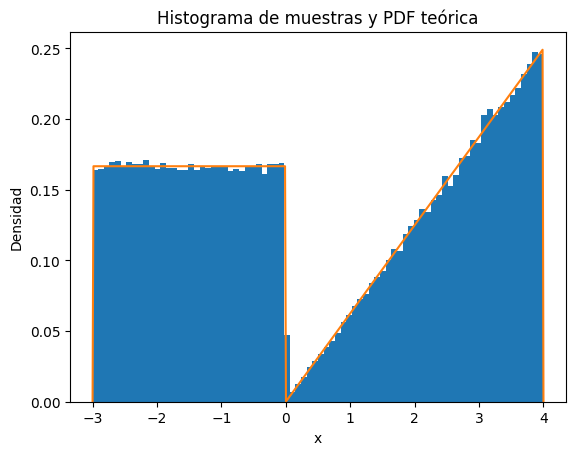

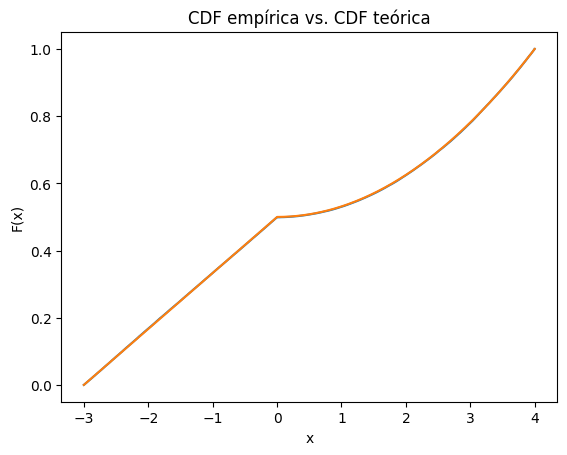

Media muestral (N=200000): 3.364726


In [ ]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# Asegura que las gráficas se muestren en Colab
%matplotlib inline

def generate_X():
    u = random.random()  # U(0,1)
    if u <= 0.5:
        return 6 * (u - 0.5)
    else:
        return math.sqrt(32 * (u - 0.5))

# Generar muestras
N = 200_000
samples = [generate_X() for _ in range(N)]

# Valores teóricos para PDF y CDF
x_vals = np.linspace(-3, 4, 500)
pdf_vals = [(1/6 if -3 < x < 0 else (x/16 if 0 < x < 4 else 0)) for x in x_vals]
cdf_vals = np.array([0 if x <= -3 else
                     0.5 + x/6 if x <= 0 else
                     0.5 + x**2/32 if x <= 4 else
                     1 for x in x_vals])

# Gráfica 1: Histograma + PDF teórica
plt.figure()
plt.hist(samples, bins=80, density=True)
plt.plot(x_vals, pdf_vals)
plt.xlabel('x')
plt.ylabel('Densidad')
plt.title('Histograma de muestras y PDF teórica')
plt.show()

# Gráfica 2: Función de distribución empírica vs. teórica
sorted_samples = np.sort(samples)
ecdf = np.arange(1, N+1) / N

plt.figure()
plt.step(sorted_samples, ecdf, where='post')
plt.plot(x_vals, cdf_vals)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('CDF empírica vs. CDF teórica')
plt.show()
print(f"Media muestral (N={N}): {media_muestral:.6f}")


# Ejercicio 5

Desarrolle el generador para la variable aleatoria con pdf dado por:

$f(x) =
\begin{cases}
\frac{1}{5} & 0< x\leq 3\\
\frac{1}{8} & 3 < x\leq 9\\
0 & \text{de lo contrario}
\end{cases}
$

## Desarrollo

Para generar valores aleatorios a partir de esta distribución, utilizaremos el método de la transformada inversa, a partir de los siguientes pasos:

### 1. Encontrar la $F(x)$

$F(x) =
\begin{cases}
0 & x<0\\
\frac{x}{5} & 0<x\leq 3\\
\frac{x}{8} + \frac{9}{40} & 3<x\leq 9\\
\frac{27}{20} & x>9
\end{cases}
$


### 2. Invertir (encontrar $F^{-1}(u)$)

Sea $U = F(x)$, donde $U \sim U(0, 1)$. Necesitamos resolver para $x$ en términos de $U$. La función inversa de la función de distribución acumulada es:

$F^{-1}(u) =
\begin{cases}
5u & 0< x \leq \frac{3}{5}\\
8u-\frac{9}{5} & \frac{3}{5}< x \leq \frac{27}{20}
\end{cases}
$

### 3. Media de la distribución

La media teórica de la distribución continua dada es:

$$\mu = \int_{0}^{3} x \cdot \frac{1}{5} dx + \int_{3}^{9} x \cdot \frac{1}{8} dx$$

La media de la distribución es entonces:
$$\mu = \frac{9}{10} + \frac{9}{2} = \frac{54}{10} = 5.4$$


### 4. Algoritmo en Python

1.  Crear una lista llamada `valores`.
2.  Para $i$ desde 1 hasta 10:
    
    a. Generar un valor aleatorio $u$ según una distribución uniforme $U(0, 1)$ usando `random.random()`.
    
    b. Si $0 \leq u \leq 0.6$: Calcular $x = 5u$.
    
    c. Si $0.6 < u \leq 1.35$: Calcular $x = 8u - \frac{9}{5}$.
    
    d. Agregar el valor $x$ a `valores`.

3.  Calcular la media muestral de `valores` usando `np.mean(valores)` y comparar con la media teórica $(\frac{54}{10})$.

## Código generación de variable aleatoria

In [ ]:
import numpy as np
import random
import math

def inversa(u):
    if 0 < u <= 0.6:
        return 5 * u
    elif 0.6 < u <= 1.35:
        return (8 * u) - (9/5)
    else:
        return None

def uniforme():
    return random.random() # U(0, 1)

# Generar 10 valores aleatorios
random.seed(67) # Opcional
num_valores = 10
valores = [inversa(uniforme()) for u in range(num_valores)]
media_muestral = np.mean(valores)
media_teorica = 54/10

# Imprimir resultados
print("RESULTADOS GENERADOR VARIABLE ALEATORIA\n")
print(f"Valores aleatorios generados:\n{valores}")
print(f"\nMedia muestral: {media_muestral:.4f}")
print(f"Media teórica: {media_teorica:.4f}")
print(f"Diferencia: {abs(media_teorica-media_muestral):.4f}")

RESULTADOS GENERADOR VARIABLE ALEATORIA

Valores aleatorios generados:
[0.3739687843655537, 4.328005886577714, 5.976749340751004, 2.0764659444559284, 5.759008931896436, 2.147331889263866, 3.17291161286985, 5.55563325221999, 1.0187704355939835, 0.19870466237525253]

Media muestral: 3.0608
Media teórica: 5.4000
Diferencia: 2.3392


## Código generación de gráficas

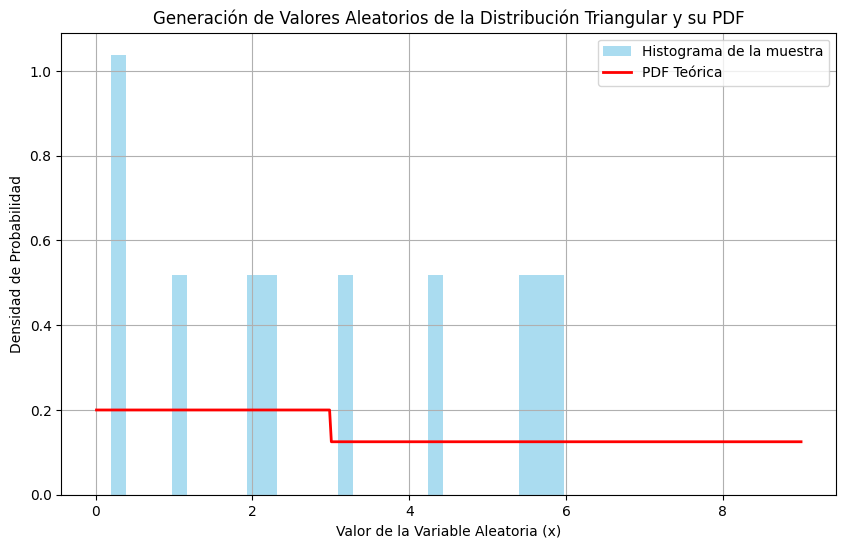

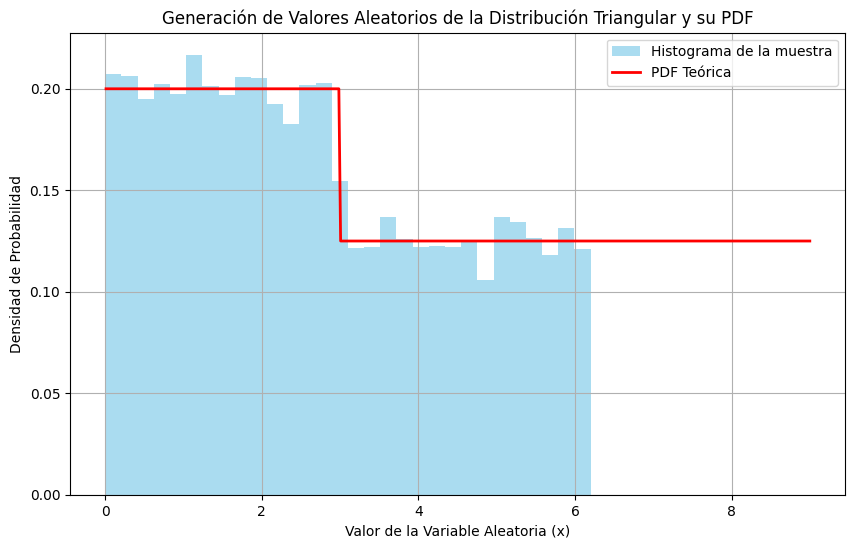

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

def inversa(u):
    if 0 < u <= 0.6:
        return 5 * u
    elif 0.6 < u <= 1.35:
        return (8 * u) - (9/5)
    else:
        return None

def uniforme():
    return random.random() # U(0, 1)

def graficar_muestra(num_valores):
    # Generar los valores aleatorios
    valores = [inversa(uniforme()) for i in range(num_valores)]

    # 1. Graficar el Histograma (Estimación de la PDF)
    plt.figure(figsize=(10, 6))
    plt.hist(valores, bins=30, density=True, alpha=0.7, color='skyblue', label='Histograma de la muestra')

    # Graficar la PDF teórica para comparar
    x = np.linspace(0.01, 9, 400)
    pdf = np.piecewise(x,
                    [((x > 0) & (x <= 3)), ((x > 3) & (x <= 9))],
                    [lambda x, *args: 0.2 , lambda x, *args: 0.125],
                    0)
    plt.plot(x, pdf, 'r-', linewidth=2, label='PDF Teórica')

    plt.title('Generación de Valores Aleatorios de la Distribución Triangular y su PDF')
    plt.xlabel('Valor de la Variable Aleatoria (x)')
    plt.ylabel('Densidad de Probabilidad')
    plt.legend()
    plt.grid(True)
    plt.show()

random.seed(67) # Opcional
graficar_muestra(10)
graficar_muestra(10000)